In [3]:
import gdown

# Google Drive file ID for CelebA dataset (you need to use the correct file ID)
file_id = '1h_oR2jMJWO3JbIM63Oj2-2SjvnZkN3NI'
destination = 'celeba.zip'

# Construct the correct download URL using the file ID
gdown.download(f'https://drive.google.com/uc?id={file_id}', destination, quiet=False)

# Unzipping the downloaded file
!unzip celeba.zip -d /content/celeba

Downloading...
From (original): https://drive.google.com/uc?id=1h_oR2jMJWO3JbIM63Oj2-2SjvnZkN3NI
From (redirected): https://drive.google.com/uc?id=1h_oR2jMJWO3JbIM63Oj2-2SjvnZkN3NI&confirm=t&uuid=3b6f0678-1455-41dd-9dd8-ce5e72856417
To: /content/celeba.zip
100%|██████████| 1.44G/1.44G [00:30<00:00, 46.6MB/s]


A streamkimeneten csak az utolsó 5000 sor látható.
 extracting: /content/celeba/img_align_celeba/197600.jpg  
 extracting: /content/celeba/img_align_celeba/197601.jpg  
 extracting: /content/celeba/img_align_celeba/197602.jpg  
 extracting: /content/celeba/img_align_celeba/197603.jpg  
 extracting: /content/celeba/img_align_celeba/197604.jpg  
 extracting: /content/celeba/img_align_celeba/197605.jpg  
 extracting: /content/celeba/img_align_celeba/197606.jpg  
 extracting: /content/celeba/img_align_celeba/197607.jpg  
 extracting: /content/celeba/img_align_celeba/197608.jpg  
 extracting: /content/celeba/img_align_celeba/197609.jpg  
 extracting: /content/celeba/img_align_celeba/197610.jpg  
 extracting: /content/celeba/img_align_celeba/197611.jpg  
 extracting: /content/celeba/img_align_celeba/197612.jpg  
 extracting: /content/celeba/img_align_celeba/197613.jpg  
 extracting: /content/celeba/img_align_celeba/197614.jpg  
 extracting: /content/celeba/img_align_celeba/197615.jpg  
 extr

In [4]:
import os
import tarfile

# Google Drive fájl ID
file_id = '18-Lq0PpRpfiNHV7CozqDQUbH1iTrtnMT'
destination = 'flowers102.tgz'

# Fájl letöltése
gdown.download(f'https://drive.google.com/uc?id={file_id}', destination, quiet=False)

# Kicsomagolás
output_dir = './flowers102'
os.makedirs(output_dir, exist_ok=True)

with tarfile.open(destination) as tar:
    tar.extractall(path=output_dir)

Downloading...
From (original): https://drive.google.com/uc?id=18-Lq0PpRpfiNHV7CozqDQUbH1iTrtnMT
From (redirected): https://drive.google.com/uc?id=18-Lq0PpRpfiNHV7CozqDQUbH1iTrtnMT&confirm=t&uuid=9b7255fd-713a-44ec-a211-9c3c6c279e29
To: /content/flowers102.tgz
100%|██████████| 345M/345M [00:10<00:00, 33.2MB/s]


In [7]:
!ls /content/celeba/img_align_celeba/

A streamkimeneten csak az utolsó 5000 sor látható.
020326.jpg  045651.jpg	070976.jpg  096301.jpg	121626.jpg  146951.jpg	172276.jpg  197601.jpg
020327.jpg  045652.jpg	070977.jpg  096302.jpg	121627.jpg  146952.jpg	172277.jpg  197602.jpg
020328.jpg  045653.jpg	070978.jpg  096303.jpg	121628.jpg  146953.jpg	172278.jpg  197603.jpg
020329.jpg  045654.jpg	070979.jpg  096304.jpg	121629.jpg  146954.jpg	172279.jpg  197604.jpg
020330.jpg  045655.jpg	070980.jpg  096305.jpg	121630.jpg  146955.jpg	172280.jpg  197605.jpg
020331.jpg  045656.jpg	070981.jpg  096306.jpg	121631.jpg  146956.jpg	172281.jpg  197606.jpg
020332.jpg  045657.jpg	070982.jpg  096307.jpg	121632.jpg  146957.jpg	172282.jpg  197607.jpg
020333.jpg  045658.jpg	070983.jpg  096308.jpg	121633.jpg  146958.jpg	172283.jpg  197608.jpg
020334.jpg  045659.jpg	070984.jpg  096309.jpg	121634.jpg  146959.jpg	172284.jpg  197609.jpg
020335.jpg  045660.jpg	070985.jpg  096310.jpg	121635.jpg  146960.jpg	172285.jpg  197610.jpg
020336.jpg  045661.jpg	070986

In [9]:
!ls /content/flowers102/jpg

image_00001.jpg  image_01639.jpg  image_03277.jpg  image_04915.jpg  image_06553.jpg
image_00002.jpg  image_01640.jpg  image_03278.jpg  image_04916.jpg  image_06554.jpg
image_00003.jpg  image_01641.jpg  image_03279.jpg  image_04917.jpg  image_06555.jpg
image_00004.jpg  image_01642.jpg  image_03280.jpg  image_04918.jpg  image_06556.jpg
image_00005.jpg  image_01643.jpg  image_03281.jpg  image_04919.jpg  image_06557.jpg
image_00006.jpg  image_01644.jpg  image_03282.jpg  image_04920.jpg  image_06558.jpg
image_00007.jpg  image_01645.jpg  image_03283.jpg  image_04921.jpg  image_06559.jpg
image_00008.jpg  image_01646.jpg  image_03284.jpg  image_04922.jpg  image_06560.jpg
image_00009.jpg  image_01647.jpg  image_03285.jpg  image_04923.jpg  image_06561.jpg
image_00010.jpg  image_01648.jpg  image_03286.jpg  image_04924.jpg  image_06562.jpg
image_00011.jpg  image_01649.jpg  image_03287.jpg  image_04925.jpg  image_06563.jpg
image_00012.jpg  image_01650.jpg  image_03288.jpg  image_04926.jpg  image_06

In [43]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import os
import torchvision
from PIL import Image
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split, Dataset

In [18]:
!pip install torch torchvision numpy matplotlib

In [62]:
celeba_images_path = '/content/celeba/img_align_celeba'
partition_file_path = '/content/celeba/list_eval_partition.txt'
flowers_images_path = '/content/flowers102/jpg'

In [12]:
# Definiáld az átalakításokat (pl. méretezés, normalizálás stb.)
transform = transforms.Compose([
    transforms.Resize((64, 64)),   # Ha kisebb képméretet szeretnél
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Normalizálás (-1, 1) közé
])

In [31]:
# Adatok betöltése
celeba_data = datasets.ImageFolder(root='/content/celeba', transform=transform)
celeba_loader = DataLoader(celeba_data, batch_size=64, shuffle=True)

# Load Flowers102 dataset
flowers_dataset = datasets.ImageFolder(root='/content/flowers102', transform=transform)
flowers_loader = DataLoader(flowers_dataset, batch_size=64, shuffle=True)

In [32]:
# Ellenőrizzük, hogy a DataLoader működik
celeba_data_iter = iter(celeba_loader)
images, labels = next(celeba_data_iter)
print(images.shape)  # Pl. torch.Size([64, 3, 64, 64])

flowers_data_iter = iter(flowers_loader)
images, labels = next(flowers_data_iter)
print(images.shape)  # Pl. torch.Size([64, 3, 64, 64])

torch.Size([64, 3, 64, 64])
torch.Size([64, 3, 64, 64])


In [35]:
partition_dict = {}
with open(partition_file_path, 'r') as file:
    for line in file.readlines():
        image_name, partition = line.strip().split()
        partition_dict[image_name] = int(partition)

In [51]:
class CelebADataset(Dataset):
    def __init__(self, root_dir, partition_dict, partition, transform=None):
        self.root_dir = root_dir
        self.partition_dict = partition_dict
        self.partition = partition
        self.transform = transform

        # Filter the image list based on the partition (0 for train, 1 for val, 2 for test)
        self.image_names = [img for img, p in partition_dict.items() if p == partition]

    def __len__(self):
        return len(self.image_names)

    def __getitem__(self, idx):
        img_name = os.path.join(self.root_dir, self.image_names[idx])
        image = Image.open(img_name)

        if self.transform:
            image = self.transform(image)

        label = self.partition_dict[self.image_names[idx]]  # Getting the partition number

        return image, label

In [52]:
# Step 4: Create the training, validation, and test datasets
celeba_train_dataset = CelebADataset(root_dir=celeba_images_path, partition_dict=partition_dict, partition=0, transform=transform)
celeba_val_dataset = CelebADataset(root_dir=celeba_images_path, partition_dict=partition_dict, partition=1, transform=transform)
celeba_test_dataset = CelebADataset(root_dir=celeba_images_path, partition_dict=partition_dict, partition=2, transform=transform)

In [56]:
# Ellenőrizd a dataset méreteit
print(f'Train dataset size: {len(celeba_train_dataset)}')
print(f'Validation dataset size: {len(celeba_val_dataset)}')
print(f'Test dataset size: {len(celeba_test_dataset)}')

Train dataset size: 162770
Validation dataset size: 19867
Test dataset size: 19962


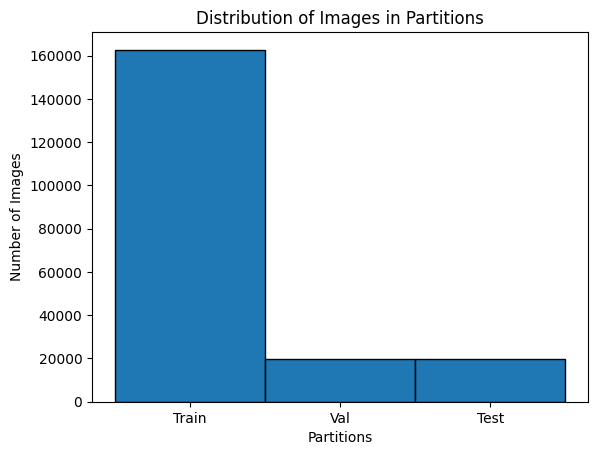

In [60]:
import matplotlib.pyplot as plt

# Címkék eloszlása
partitions = list(partition_dict.values())
plt.hist(partitions, bins=[-0.5, 0.5, 1.5, 2.5], edgecolor='black')
plt.xticks([0, 1, 2], ['Train', 'Val', 'Test'])
plt.xlabel('Partitions')
plt.ylabel('Number of Images')
plt.title('Distribution of Images in Partitions')
plt.show()

In [63]:
def check_image_validity(image_path):
    try:
        with Image.open(image_path) as img:
            img.verify()  # Verify that it is an image
        return True
    except (IOError, SyntaxError):
        return False

# Ellenőrizzük a CelebA képeket
invalid_images = [img for img in os.listdir(celeba_images_path) if not check_image_validity(os.path.join(celeba_images_path, img))]
print(f'Invalid CelebA images: {len(invalid_images)}')


Invalid CelebA images: 0


Images batch shape: torch.Size([64, 3, 64, 64])
Labels batch shape: torch.Size([64])


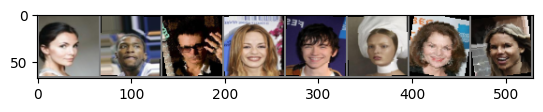

In [59]:
# Ellenőrizzük, hogy a képek helyesen töltődnek-e be
train_data_iter = iter(DataLoader(celeba_test_dataset, batch_size=64, shuffle=True))
images, labels = next(train_data_iter)

# Képek és címkék méretének kiírása
print(f'Images batch shape: {images.shape}')  # Pl. (64, 3, 64, 64)
print(f'Labels batch shape: {labels.shape}')  # Pl. (64,)

# Képek megjelenítése
import matplotlib.pyplot as plt
import torchvision

def imshow(img):
    img = img / 2 + 0.5  # Unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Megjelenítjük az első 8 képet
imshow(torchvision.utils.make_grid(images[:8]))


In [53]:
# Step 5: Create DataLoader objects
celeba_train_loader = DataLoader(celeba_train_dataset, batch_size=64, shuffle=True)
celeba_val_loader = DataLoader(celeba_val_dataset, batch_size=64, shuffle=False)
celeba_test_loader = DataLoader(celeba_test_dataset, batch_size=64, shuffle=False)

In [54]:
# Fetch a batch from the training DataLoader
data_iter = iter(celeba_train_loader)
images, labels = next(data_iter)

# Print the shape of the images and labels to check if they match the expected dimensions
print(f'Images batch shape: {images.shape}')  # Should be (batch_size, channels, height, width)
print(f'Labels batch shape: {labels.shape}')  # Should be (batch_size,)


Images batch shape: torch.Size([64, 3, 64, 64])
Labels batch shape: torch.Size([64])


In [ ]:
# Képek mentése tensor formátumban (opcionális)
save_path = '/content/prepared_data.pt'
torch.save(celeba_data, save_path)

# Későbbi betöltés
loaded_data = torch.load(save_path)

<ipython-input-15-da1b67220dea>:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_data = torch.load(save_path)
